# **Alicia Jocelyn Siahaya - 2602072552**

Link video : 
https://binusianorg-my.sharepoint.com/personal/alicia_siahaya_binus_ac_id/_layouts/15/guestaccess.aspx?share=Ec405m95H8hJoi_RvR2lVpIBmF7rCYnIsUrPece9ryIs1w&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJPbmVEcml2ZUZvckJ1c2luZXNzIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXciLCJyZWZlcnJhbFZpZXciOiJNeUZpbGVzTGlua0NvcHkifX0&e=wWKHtE

Link folder : 
https://binusianorg-my.sharepoint.com/personal/alicia_siahaya_binus_ac_id/_layouts/15/guestaccess.aspx?share=EhX4hFWrnzpLiwW9GVpcfSIBGtW13GAD78T-8FTDk6xh0A&e=azF1zx

# **Import Libraries**

In [175]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import pickle as pkl

import warnings
warnings.filterwarnings('ignore')

# **Read Data**

Perempuan dengan NIM Genap → data D

In [176]:
df = pd.read_csv('data_1D.csv')
df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,83,retired,divorced,basic.4y,no,no,no,cellular,nov,tue,242.0,1,3,3,success,yes
1,1,32,services,married,high.school,no,no,no,telephone,may,tue,190.0,3,999,0,nonexistent,no
2,2,31,admin.,single,university.degree,no,yes,no,telephone,may,wed,325.0,2,999,0,nonexistent,no
3,3,33,admin.,single,university.degree,no,yes,no,telephone,aug,thu,158.0,1,999,0,nonexistent,no
4,4,39,services,married,high.school,no,yes,no,telephone,jul,mon,158.0,1,999,0,nonexistent,no


# **Data Understanding**

In [177]:
df.shape

(8238, 17)

Dataset ini memiliki 8238 rows dan 17 kolom/features

In [178]:
df.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [179]:
df.describe()

,Unnamed: 0,age,duration,campaign,pdays,previous
count,8238.000000,8238.000000,8226.000000,8238.000000,8238.000000,8238.000000
mean,4118.500000,39.928866,258.179066,2.565429,963.904831,0.169701
std,2378.250092,10.512521,266.734969,2.792797,183.413644,0.492601
min,0.000000,17.000000,4.000000,1.000000,0.000000,0.000000
25%,2059.250000,32.000000,102.000000,1.000000,999.000000,0.000000
50%,4118.500000,38.000000,180.000000,2.000000,999.000000,0.000000
75%,6177.750000,47.000000,319.750000,3.000000,999.000000,0.000000
max,8237.000000,89.000000,4918.000000,43.000000,999.000000,6.000000


Pada kolom `pdays` terdapat value '999' yang berarti customer tidak pernah dihubungi pada campaign sebelumnya. Value 999 akan diganti dengan -1

In [180]:
df['pdays'] = df['pdays'].replace(999, -1)

In [181]:
df.describe()

,Unnamed: 0,age,duration,campaign,pdays,previous
count,8238.000000,8238.000000,8226.000000,8238.000000,8238.000000,8238.000000
mean,4118.500000,39.928866,258.179066,2.565429,-0.771061,0.169701
std,2378.250092,10.512521,266.734969,2.792797,1.367525,0.492601
min,0.000000,17.000000,4.000000,1.000000,-1.000000,0.000000
25%,2059.250000,32.000000,102.000000,1.000000,-1.000000,0.000000
50%,4118.500000,38.000000,180.000000,2.000000,-1.000000,0.000000
75%,6177.750000,47.000000,319.750000,3.000000,-1.000000,0.000000
max,8237.000000,89.000000,4918.000000,43.000000,26.000000,6.000000


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   8238 non-null   int64  
 1   age          8238 non-null   int64  
 2   job          8230 non-null   object 
 3   marital      8238 non-null   object 
 4   education    8238 non-null   object 
 5   default      8238 non-null   object 
 6   housing      8238 non-null   object 
 7   loan         8238 non-null   object 
 8   contact      8238 non-null   object 
 9   month        8238 non-null   object 
 10  day_of_week  8238 non-null   object 
 11  duration     8226 non-null   float64
 12  campaign     8238 non-null   int64  
 13  pdays        8238 non-null   int64  
 14  previous     8238 non-null   int64  
 15  poutcome     8238 non-null   object 
 16  y            8238 non-null   object 
dtypes: float64(1), int64(5), object(11)
memory usage: 1.1+ MB


Terdapat 3 jenis data type : 
- float : 1 variabel
- integer : 5 variabel
- object/string : 11 variabel

#### **Drop irrelevant column**

Menghapus kolom `Unnamed: 0` karena unique dan tidak relevan untuk digunakan pada problem ini

In [ ]:
df = df.drop(columns=['Unnamed: 0'], axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,83,retired,divorced,basic.4y,no,no,no,cellular,nov,tue,242.0,1,3,3,success,yes
1,32,services,married,high.school,no,no,no,telephone,may,tue,190.0,3,-1,0,nonexistent,no
2,31,admin.,single,university.degree,no,yes,no,telephone,may,wed,325.0,2,-1,0,nonexistent,no
3,33,admin.,single,university.degree,no,yes,no,telephone,aug,thu,158.0,1,-1,0,nonexistent,no
4,39,services,married,high.school,no,yes,no,telephone,jul,mon,158.0,1,-1,0,nonexistent,no


### **Group data berdasarkan data type**

Melakukan grouping variabel berdasarkan data typenya, yaitu categorical dan numerical

In [184]:
cat_cols = df.select_dtypes(include=['object'])
cat_cols.columns
cat_cols = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y']]

In [185]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
num_cols.columns
num_cols = df[['age', 'duration', 'campaign', 'pdays', 'previous']]

### **Value counts untuk kolom categorical**

In [186]:
for col in cat_cols.columns:
    print(df[col].value_counts())
    print()

job
admin.           2033
blue-collar      1870
technician       1372
services          822
management        546
retired           366
entrepreneur      294
self-employed     263
housemaid         219
unemployed        196
student           184
unknown            65
Name: count, dtype: int64

marital
married     4994
single      2338
divorced     892
unknown       14
Name: count, dtype: int64

education
university.degree      2379
high.school            1915
basic.9y               1243
professional.course    1043
basic.4y                817
basic.6y                486
unknown                 349
illiterate                6
Name: count, dtype: int64

default
no         6491
unknown    1747
Name: count, dtype: int64

housing
yes        4284
no         3749
unknown     205
Name: count, dtype: int64

loan
no         6741
yes        1292
unknown     205
Name: count, dtype: int64

contact
cellular     5232
telephone    3006
Name: count, dtype: int64

month
may    2729
jul    1481
aug    118

### **Check for missing values**

In [187]:
df.isna().sum()

age             0
job             8
marital         0
education       0
default         0
housing         0
loan            0
contact         0
month           0
day_of_week     0
duration       12
campaign        0
pdays           0
previous        0
poutcome        0
y               0
dtype: int64

Terdapat missing value pada kolom `job` dan `duration`. Imputasi akan dilakukan setelah proses splitting

# **Exploratory Data Analysis**

### **1. Target variable `y`**

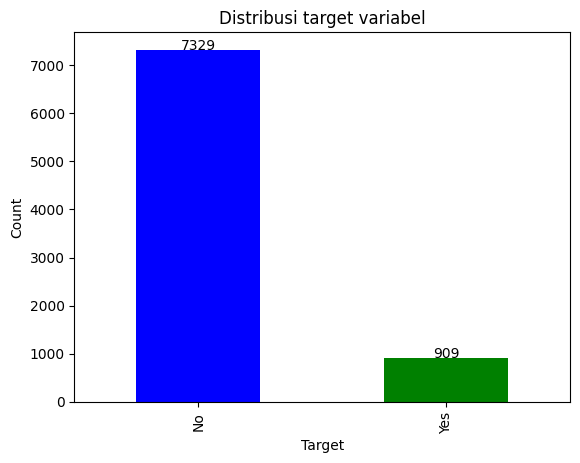

In [268]:
target_counts = df['y'].value_counts()

ax = target_counts.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribusi target variabel')

for i, freq in enumerate(target_counts):
    ax.text(i, freq + 0.1, str(freq), ha='center')

plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Terlihat dengan jelas terdapat class imbalance pada target variable dimana `no` merupakan kelas majority yaitu sebesar 89%, dan `yes` sebagai kelas minority sebesar 11%. 

Masalah ini dapat mengakibatkan bias pada kinerja model. Karena `no` merupakan majority class, maka model akan lebih cenderung memprediksi kelas `no` daripada kelas `yes`. Problem ini membutuhkan model untuk memprediksi kelas `yes` dengan performa yang baik untuk memprediksi jumlah pelanggan yang akan melakukan deposit ke bank.

### **2. Edukasi dan deposit**

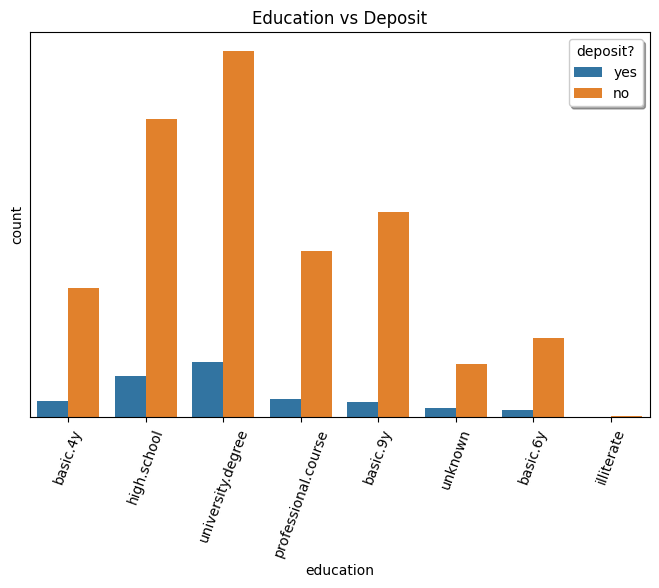

In [270]:
plt.figure(figsize=(8, 5))
plt.title('Education vs Deposit')
g = sns.countplot(x= 'education', hue = 'y', data=df)
plt.xticks(rotation=70)
plt.yticks([])
plt.legend(title='deposit?', ncol=1, fancybox=True, shadow=True)
plt.show()

Dari tabel ini kita bisa lihat dari seluruh level pendidikan, mayoritas pelanggan memutuskan untuk tidak melakukan deposit. Pelanggan dengan tingkat pendidikan yang tinggi (high school, university degree, dan professional course) cenderung tidak melakukan deposito.

### **3. Status pernikahan vs deposit**

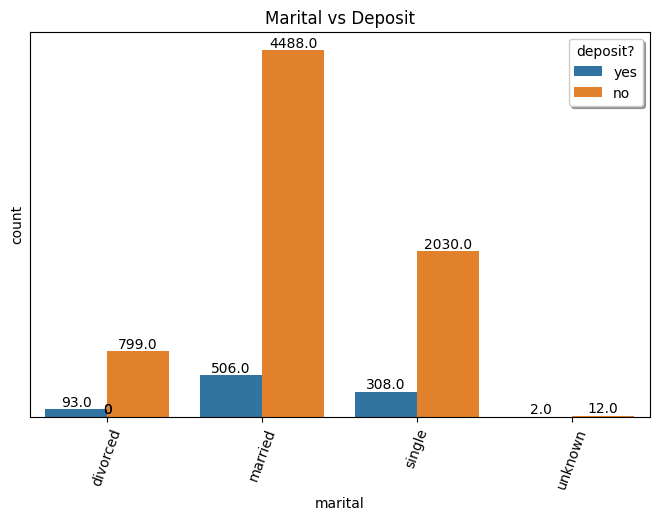

In [274]:
plt.figure(figsize=(8, 5))
plt.title('Marital vs Deposit')
g = sns.countplot(x='marital', hue='y', data=df)
plt.xticks(rotation=70)
plt.yticks([])
plt.legend(title='deposit?', ncol=1, fancybox=True, shadow=True)

for p in g.patches:
    height = p.get_height()
    g.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
               ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

Dari tabel diatas, pelanggan yang berstatus `married` lebih cenderung untuk tidak melakukan deposito, diikuti dengan pelanggan berstatus `single`. 

### **4. Housing loan vs deposit**

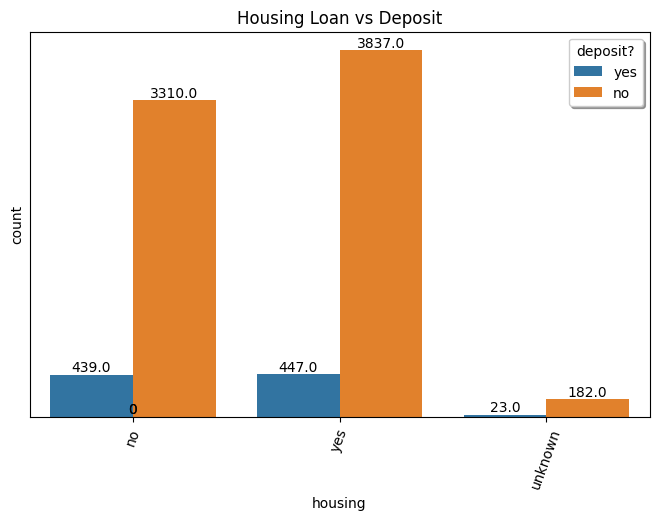

In [275]:
plt.figure(figsize=(8, 5))
plt.title('Housing Loan vs Deposit')
g = sns.countplot(x='housing', hue='y', data=df)
plt.xticks(rotation=70)
plt.yticks([])
plt.legend(title='deposit?', ncol=1, fancybox=True, shadow=True)

for p in g.patches:
    height = p.get_height()
    g.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
               ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

Pelanggan yang mempunyai pinjaman rumah cenderung tidak melakukan deposit.

# **Split Data**

Membagi data menjadi 80% training set dan 20% testing set

In [189]:
input_df = df.drop('y', axis=1)
output_df = df['y']

In [190]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

In [191]:
x_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
3805,31,blue-collar,single,basic.9y,no,yes,yes,cellular,jun,tue,103.0,1,3,2,success
5900,32,technician,married,professional.course,no,no,yes,cellular,jul,wed,183.0,1,-1,0,nonexistent
5022,47,technician,married,professional.course,no,yes,yes,cellular,aug,fri,78.0,3,-1,0,nonexistent
4556,36,admin.,single,university.degree,no,yes,no,cellular,jul,thu,10.0,3,-1,0,nonexistent
4139,45,management,married,university.degree,no,no,yes,cellular,nov,wed,391.0,2,-1,0,nonexistent


In [192]:
x_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
706,46,admin.,divorced,university.degree,unknown,no,no,telephone,may,wed,93.0,1,-1,0,nonexistent
5968,35,technician,married,high.school,unknown,yes,no,cellular,jul,tue,740.0,1,-1,0,nonexistent
1665,24,services,single,high.school,no,yes,no,cellular,jul,wed,242.0,1,-1,0,nonexistent
6676,51,admin.,married,high.school,no,no,no,cellular,may,tue,40.0,4,-1,0,nonexistent
5606,36,admin.,married,high.school,no,yes,no,telephone,jul,tue,305.0,7,-1,0,nonexistent


In [277]:
print("Shape of training set :", x_train.shape)
print("Shape of testing set :", x_test.shape)

Shape of training set : (6590, 43)
Shape of testing set : (1648, 43)


## **Impute missing values**

1. Job

`Job` adalah variabel kategorikal, maka proses imputasi dilakukan dengan modus

In [194]:
print('Mode of job :', st.mode(x_train['job']))

Mode of job : admin.


In [195]:
x_train['job'].fillna(st.mode(x_train['job']), inplace=True)
x_test['job'].fillna(st.mode(x_train['job']), inplace=True)

2. Duration

`Duration` adalah variabel numerikal, maka proses imputasi dilakukan dengan mean atau median. Jika terdapat outlier, maka imputasi dengan median. Jika tidak ada outlier, maka imputasi dengan mean.

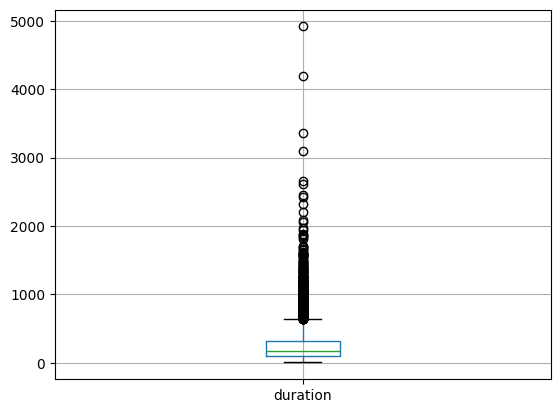

In [196]:
boxplot = x_train.boxplot(column='duration')
plt.show()

Karena pada kolom `duration` ditemukan outliers, maka imputasi dilakukan dengan median.

In [197]:
print('Median of duration :', x_train['duration'].median())

Median of duration : 179.0


In [198]:
x_train['duration'].fillna(x_train['duration'].median(), inplace=True)
x_test['duration'].fillna(x_train['duration'].median(), inplace=True)

Cek missing values kembali

In [199]:
x_train.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64

In [200]:
x_test.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64

Sudah tidak ada missing value ditemukan pada training dan testing set

# **Feature Engineering**

### 1. Categorical (Nominal) with One Hot Encoder

Untuk kolom categorical yang nominal, encoding akan dilakukan menggunakan One Hot Encoder karena tidak memiliki tingkatan.

In [201]:
cat_cols.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [202]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder()

encode_train = x_train[['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome']]
encode_test = x_test[['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome']]

train_data = pd.DataFrame(OHE.fit_transform(encode_train).toarray(), columns = OHE.get_feature_names_out())
test_data = pd.DataFrame(OHE.transform(encode_test).toarray(), columns=OHE.get_feature_names_out())

x_train = x_train.reset_index()
x_test = x_test.reset_index()

x_train_enc = pd.concat([x_train, train_data], axis = 1)
x_test_enc = pd.concat([x_test, test_data], axis = 1)


Hapus kolom asli

In [203]:
x_train_enc.columns

Index(['index', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [204]:
x_train = x_train_enc[['age', 'default', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success']]

In [205]:
x_test = x_test_enc[['age', 'default', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success']]

Simpan dalam pickle

In [206]:
filename = 'categorical_encode.pkl'
pkl.dump(OHE, open(filename, 'wb'))

### 2. Categorical (Ordinal) with manually

Kolom `month` dan `day` merupakan variabel kategorikal yang memiliki tingkatan, maka encoding dilakukan secara manual dengan meng-assign nomor untuk bulan dan hari.

In [207]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

day_mapping = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5
}


x_train['month'] = x_train['month'].map(month_mapping)
x_train['day_of_week'] = x_train['day_of_week'].map(day_mapping)

x_test['month'] = x_test['month'].map(month_mapping)
x_test['day_of_week'] = x_test['day_of_week'].map(day_mapping)

Simpan dalam pickle

In [208]:
filename = 'month_encode.pkl'
pkl.dump(month_mapping, open(filename, 'wb'))

filename = 'day_encode.pkl'
pkl.dump(day_mapping, open(filename, 'wb'))

### **3. Encode `default`**

Pada metadata kolom `default` ada 3 values, yaitu `yes`, `no` dan `unknown`. Namun, saat melakukan value_counts() diatas, kolom ini hanya terdiri dari `no` dan `unknown`. Untuk itu, encoding perlu dilakukan secara manual untuk memastikan jika ada data baru dengan value `yes`, data tersebut akan tetap ter-encode.

In [209]:
default_mapping = {
    'yes': 1, 'no': 2, 'unknown': 3
}

x_train['default'] = x_train['default'].map(default_mapping)
x_test['default'] = x_test['default'].map(default_mapping)

Simpan dalam pickle

In [210]:
filename = 'default_encode.pkl'
pkl.dump(default_mapping, open(filename, 'wb'))

## **Scaling**

Mengidentifikasi outliers pada kolom-kolom numerikal untuk menentukan jenis scaler yang akan digunakan.

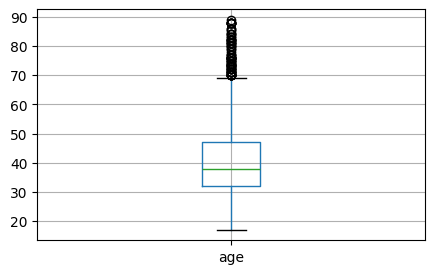

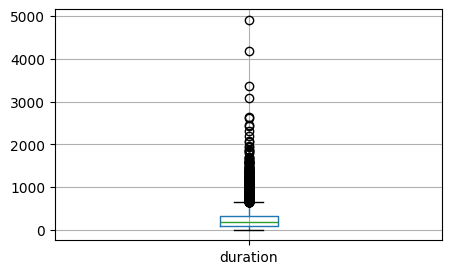

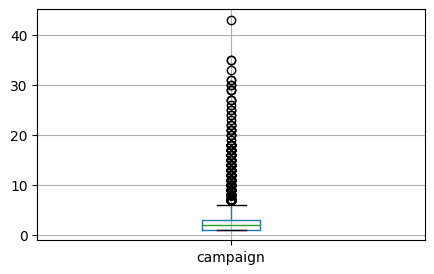

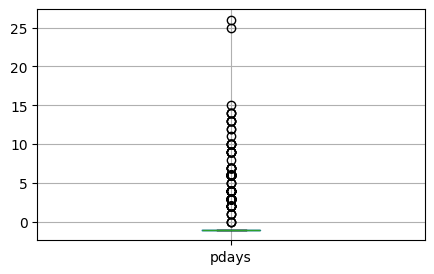

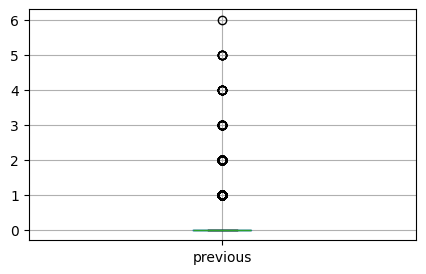

In [213]:
for i in num_cols:
    plt.figure(figsize=(5,3))
    boxplot = x_train.boxplot(column=i)
    plt.show()

Karena terdapat outliers pada seluruh kolom numerikal, maka saya akan gunakan Robust Scaler karena merupakan jenis scaler terbaik saat ada outliers.

In [214]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [215]:
num_cols.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [216]:
scaler = RobustScaler()

x_train[['age', 'duration', 'campaign', 'pdays', 'previous']] = scaler.fit_transform(x_train[['age', 'duration', 'campaign', 'pdays', 'previous']])
x_test[['age', 'duration', 'campaign', 'pdays', 'previous']] = scaler.transform(x_test[['age', 'duration', 'campaign', 'pdays', 'previous']])

In [217]:
filename = 'scaler.pkl'
pkl.dump(scaler, open(filename, 'wb'))

## **Handling Class Imbalance**

Saat EDA sebelumnya, teridentifikasi adanya class imbalance. Maka akan dilakukan **oversampling** dari SMOTE. SMOTE membuat data sintetis baru untuk minority class. Oversampling hanya dilakukan pada training set.

Referensi : https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

In [218]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)

In [219]:
print("Shape of training set before oversampling :", x_train.shape, y_train.shape)
print("Shape of training set after oversampling :", x_train_resampled.shape, y_train_resampled.shape)

Shape of training set before oversampling : (6590, 43) (6590,)
Shape of training set after oversampling : (11788, 43) (11788,)


In [279]:
y_no = (y_train=='no').sum()
y_yes = (y_train=='yes').sum()
print("Target 'no' before oversampling :", y_no)
print("Target 'yes' before oversampling :", y_yes)

len_data = len(y_train)

print("\nPercentage of Target Variable")
print("Target no:", f"{(y_no / len_data) * 100:.2f}%")
print("Target yes:", f"{(y_yes / len_data) * 100:.2f}%")

y_no_res = (y_train_resampled=='no').sum()
y_yes_res = (y_train_resampled=='yes').sum()
print("\nTarget 'no' after oversampling :", y_no_res)
print("Target 'yes' after oversampling :", y_yes_res)

len_data_res = len(y_train_resampled)

print("\nPercentage of Target Variable")
print("Target no :", f"{(y_no_res/len_data_res)*100}%")
print("Target yes :", f"{(y_yes_res/len_data_res)*100}%")

Target 'no' before oversampling : 5894
Target 'yes' before oversampling : 696

Percentage of Target Variable
Target no: 89.44%
Target yes: 10.56%

Target 'no' after oversampling : 5894
Target 'yes' after oversampling : 5894

Percentage of Target Variable
Target no : 50.0%
Target yes : 50.0%


Sebelumnya, terlihat class imbalance yang besar dimana kelas `no` adalah majority class dan kelas `yes` adalah minority class. Setelah dilakukan oversampling, kelas   `no`  dan `yes` sudah seimbang. 

# **Modelling**

In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

Define tabel baru untuk menyimpan hasil performa model dan hasil confusion matrix.

In [222]:
results = pd.DataFrame(columns=['Model Name','Accuracy','Precision yes', 'Precision no', 'Recall yes', 'Recall no', 'F1-Score yes', 'F1-Score no'])
cm_results = pd.DataFrame(columns=['Model Name', 'False Positives', 'False Negatives'])


### **1. Logistic Regression**

In [223]:
LR = LogisticRegression()
LR.fit(x_train_resampled, y_train_resampled)

LogisticRegression()

In [224]:
y_pred_LR = LR.predict(x_test)

In [225]:
print('\nClassification Report MODEL 1 : Logistic Regression\n')
print(classification_report(y_test, y_pred_LR, target_names=['no','yes']))


Classification Report MODEL 1 : Logistic Regression

              precision    recall  f1-score   support

          no       0.95      0.84      0.89      1435
         yes       0.40      0.71      0.51       213

    accuracy                           0.82      1648
   macro avg       0.67      0.77      0.70      1648
weighted avg       0.88      0.82      0.84      1648



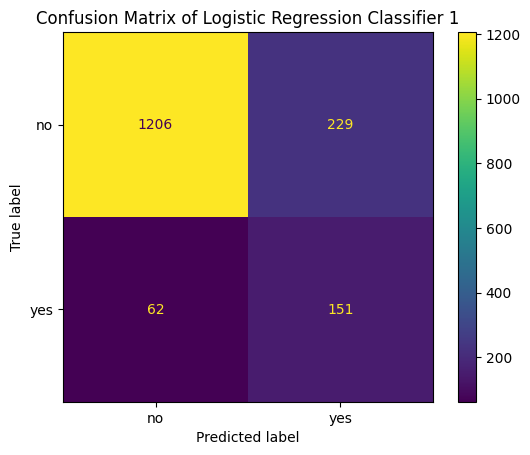

,Model Name,False Positives,False Negatives
0,Logistic Regression 1,229,62


In [226]:
cm_matrix = confusion_matrix(y_test, y_pred_LR)

FP = cm_matrix[0, 1] 
FN = cm_matrix[1, 0] 

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_matrix, display_labels=['no', 'yes'])
cm_display.plot()
plt.title("Confusion Matrix of Logistic Regression Classifier 1")
plt.show()

cm_result = ['Logistic Regression 1', FP, FN]
cm_results.loc[len(cm_results)] = cm_result
cm_results

In [227]:
precision_yes = precision_score(y_test, y_pred_LR, pos_label='yes')
recall_yes = recall_score(y_test, y_pred_LR, pos_label='yes')
f1_yes = f1_score(y_test, y_pred_LR, pos_label='yes')
precision_no = precision_score(y_test, y_pred_LR, pos_label='no')
recall_no = recall_score(y_test, y_pred_LR, pos_label='no')
f1_no = f1_score(y_test, y_pred_LR, pos_label='no')

model_result = ['Logistic Regression 1', accuracy_score(y_test, y_pred_LR), 
                precision_yes, precision_no, recall_yes, recall_no,
                f1_yes, f1_no]

results.loc[len(results)] = model_result
results

,Model Name,Accuracy,Precision yes,Precision no,Recall yes,Recall no,F1-Score yes,F1-Score no
0,Logistic Regression 1,0.823422,0.397368,0.951104,0.70892,0.840418,0.509275,0.892342


#### **Tuning Logistic Regression**

In [228]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2'],             
    'solver': ['liblinear']            
}

LogReg2 = LogisticRegression(max_iter = 1000)

LogReg2 = GridSearchCV(LogReg2,
                       param_grid = param_grid,
                       scoring = 'accuracy',
                       cv = 5)

LogReg2.fit(x_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [229]:
print("Hyperparameters to use after using GridSearchCV :")
print(LogReg2.best_estimator_)

Hyperparameters to use after using GridSearchCV :
LogisticRegression(C=1, max_iter=1000, solver='liblinear')


In [230]:
LR2 = LogisticRegression(C=1, max_iter=1000, solver='liblinear')
LR2.fit(x_train_resampled, y_train_resampled)

LogisticRegression(C=1, max_iter=1000, solver='liblinear')

In [231]:
y_pred_LR2 = LR2.predict(x_test)

In [232]:
print('\nClassification Report MODEL 1.2 : Logistic Regression (Tuned)\n')
print(classification_report(y_test, y_pred_LR2, target_names=['no','yes']))


Classification Report MODEL 1.2 : Logistic Regression (Tuned)

              precision    recall  f1-score   support

          no       0.95      0.84      0.89      1435
         yes       0.40      0.71      0.51       213

    accuracy                           0.82      1648
   macro avg       0.67      0.77      0.70      1648
weighted avg       0.88      0.82      0.84      1648



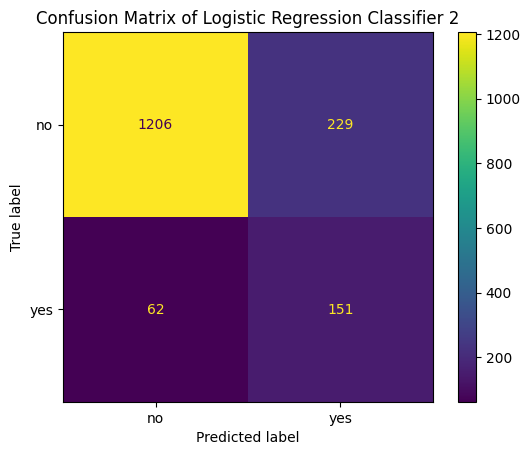

,Model Name,False Positives,False Negatives
0,Logistic Regression 1,229,62
1,Logistic Regression 2,229,62


In [233]:
cm_matrix = confusion_matrix(y_test, y_pred_LR2)

FP = cm_matrix[0, 1] 
FN = cm_matrix[1, 0] 

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_matrix, display_labels=['no', 'yes'])
cm_display.plot()
plt.title("Confusion Matrix of Logistic Regression Classifier 2")
plt.show()

cm_result = ['Logistic Regression 2', FP, FN]
cm_results.loc[len(cm_results)] = cm_result
cm_results

In [234]:
precision_yes = precision_score(y_test, y_pred_LR2, pos_label='yes')
recall_yes = recall_score(y_test, y_pred_LR2, pos_label='yes')
f1_yes = f1_score(y_test, y_pred_LR2, pos_label='yes')
precision_no = precision_score(y_test, y_pred_LR2, pos_label='no')
recall_no = recall_score(y_test, y_pred_LR2, pos_label='no')
f1_no = f1_score(y_test, y_pred_LR2, pos_label='no')

model_result = ['Logistic Regression 2', accuracy_score(y_test, y_pred_LR2), 
                precision_yes, precision_no, recall_yes, recall_no,
                f1_yes, f1_no]

results.loc[len(results)] = model_result
results

,Model Name,Accuracy,Precision yes,Precision no,Recall yes,Recall no,F1-Score yes,F1-Score no
0,Logistic Regression 1,0.823422,0.397368,0.951104,0.70892,0.840418,0.509275,0.892342
1,Logistic Regression 2,0.823422,0.397368,0.951104,0.70892,0.840418,0.509275,0.892342


### **2. Random Forest**

In [235]:
RF = RandomForestClassifier()
RF.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier()

In [236]:
y_pred_RF = RF.predict(x_test)

In [237]:
print('\nClassification Report MODEL 2 : Random Forest\n')
print(classification_report(y_test, y_pred_RF, target_names=['no','yes']))


Classification Report MODEL 2 : Random Forest

              precision    recall  f1-score   support

          no       0.92      0.96      0.94      1435
         yes       0.61      0.41      0.49       213

    accuracy                           0.89      1648
   macro avg       0.76      0.69      0.72      1648
weighted avg       0.88      0.89      0.88      1648



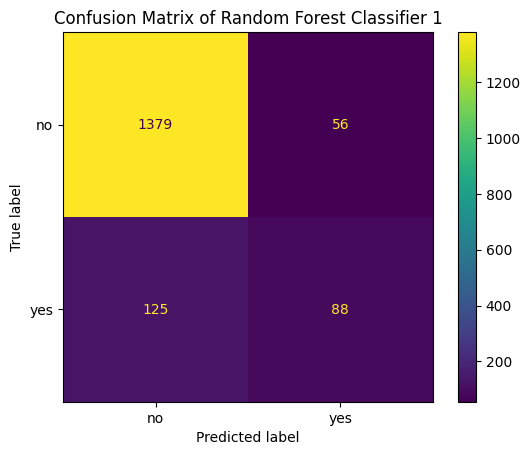

,Model Name,False Positives,False Negatives
0,Logistic Regression 1,229,62
1,Logistic Regression 2,229,62
2,Random Forest 1,56,125


In [238]:
cm_matrix = confusion_matrix(y_test, y_pred_RF)

FP = cm_matrix[0, 1] 
FN = cm_matrix[1, 0] 

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_matrix, display_labels=['no', 'yes'])
cm_display.plot()
plt.title("Confusion Matrix of Random Forest Classifier 1")
plt.show()

cm_result = ['Random Forest 1', FP, FN]
cm_results.loc[len(cm_results)] = cm_result
cm_results

In [239]:
precision_yes = precision_score(y_test, y_pred_RF, pos_label='yes')
recall_yes = recall_score(y_test, y_pred_RF, pos_label='yes')
f1_yes = f1_score(y_test, y_pred_RF, pos_label='yes')
precision_no = precision_score(y_test, y_pred_RF, pos_label='no')
recall_no = recall_score(y_test, y_pred_RF, pos_label='no')
f1_no = f1_score(y_test, y_pred_RF, pos_label='no')

model_result = ['Random Forest 1', accuracy_score(y_test, y_pred_RF), 
                precision_yes, precision_no, recall_yes, recall_no,
                f1_yes, f1_no]

results.loc[len(results)] = model_result
results

,Model Name,Accuracy,Precision yes,Precision no,Recall yes,Recall no,F1-Score yes,F1-Score no
0,Logistic Regression 1,0.823422,0.397368,0.951104,0.708920,0.840418,0.509275,0.892342
1,Logistic Regression 2,0.823422,0.397368,0.951104,0.708920,0.840418,0.509275,0.892342
2,Random Forest 1,0.890170,0.611111,0.916888,0.413146,0.960976,0.492997,0.938414


#### **Tuning Random Forest**

In [240]:
param_grid = {
    'n_estimators': [1, 10],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 4]               
}

RF_grid = RandomForestClassifier()

RF_grid = GridSearchCV(RF_grid, 
                       param_grid=param_grid, 
                       cv=5,
                       scoring='accuracy')

RF_grid.fit(x_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [1, 10]},
             scoring='accuracy')

In [241]:
print("Hyperparameters to use after using GridSearchCV :")
print(RF_grid.best_estimator_)

Hyperparameters to use after using GridSearchCV :
RandomForestClassifier(n_estimators=10)


In [242]:
RF2 = RandomForestClassifier(n_estimators=10)
RF2.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=10)

In [243]:
y_pred_RF2 = RF2.predict(x_test)

In [244]:
from sklearn.metrics import classification_report
print('\nClassification Report MODEL 2.2 : Random Forest (Tuned)\n')
print(classification_report(y_test, y_pred_RF2, target_names=['no','yes']))


Classification Report MODEL 2.2 : Random Forest (Tuned)

              precision    recall  f1-score   support

          no       0.91      0.96      0.94      1435
         yes       0.61      0.39      0.47       213

    accuracy                           0.89      1648
   macro avg       0.76      0.68      0.71      1648
weighted avg       0.87      0.89      0.88      1648



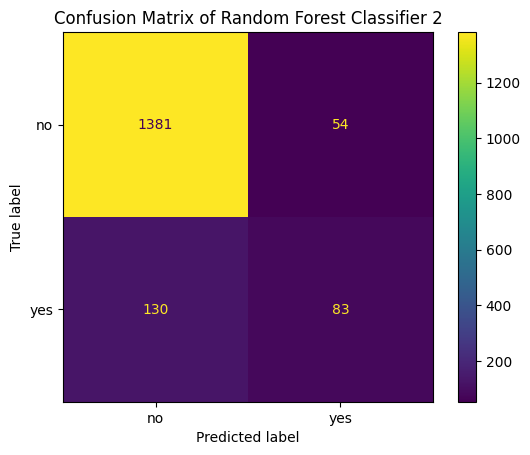

,Model Name,False Positives,False Negatives
0,Logistic Regression 1,229,62
1,Logistic Regression 2,229,62
2,Random Forest 1,56,125
3,Random Forest 2,54,130


In [245]:
cm_matrix = confusion_matrix(y_test, y_pred_RF2)

FP = cm_matrix[0, 1] 
FN = cm_matrix[1, 0] 

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_matrix, display_labels=['no', 'yes'])
cm_display.plot()
plt.title("Confusion Matrix of Random Forest Classifier 2")
plt.show()

cm_result = ['Random Forest 2', FP, FN]
cm_results.loc[len(cm_results)] = cm_result
cm_results

In [246]:
precision_yes = precision_score(y_test, y_pred_RF2, pos_label='yes')
recall_yes = recall_score(y_test, y_pred_RF2, pos_label='yes')
f1_yes = f1_score(y_test, y_pred_RF2, pos_label='yes')
precision_no = precision_score(y_test, y_pred_RF2, pos_label='no')
recall_no = recall_score(y_test, y_pred_RF2, pos_label='no')
f1_no = f1_score(y_test, y_pred_RF2, pos_label='no')

model_result = ['Random Forest 2', accuracy_score(y_test, y_pred_RF2), 
                precision_yes, precision_no, recall_yes, recall_no,
                f1_yes, f1_no]

results.loc[len(results)] = model_result
results

,Model Name,Accuracy,Precision yes,Precision no,Recall yes,Recall no,F1-Score yes,F1-Score no
0,Logistic Regression 1,0.823422,0.397368,0.951104,0.708920,0.840418,0.509275,0.892342
1,Logistic Regression 2,0.823422,0.397368,0.951104,0.708920,0.840418,0.509275,0.892342
2,Random Forest 1,0.890170,0.611111,0.916888,0.413146,0.960976,0.492997,0.938414
3,Random Forest 2,0.888350,0.605839,0.913964,0.389671,0.962369,0.474286,0.937542


### **3. SVM**

In [247]:
svm = SVC()
svm.fit(x_train_resampled, y_train_resampled)

SVC()

In [248]:
y_pred_svm = svm.predict(x_test)

In [249]:
print('\nClassification Report MODEL 3 : SVM\n')
print(classification_report(y_test, y_pred_svm, target_names=['no','yes']))


Classification Report MODEL 3 : SVM

              precision    recall  f1-score   support

          no       0.96      0.83      0.89      1435
         yes       0.40      0.77      0.53       213

    accuracy                           0.82      1648
   macro avg       0.68      0.80      0.71      1648
weighted avg       0.89      0.82      0.84      1648



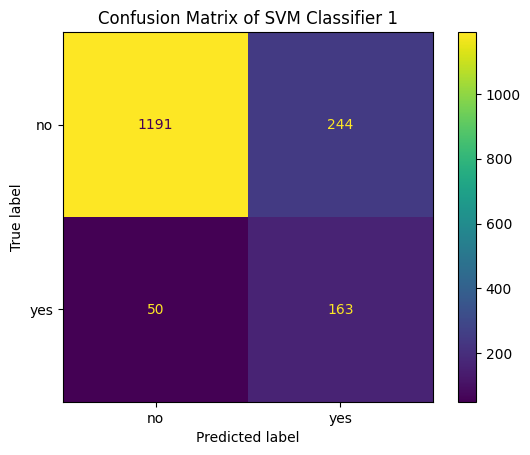

,Model Name,False Positives,False Negatives
0,Logistic Regression 1,229,62
1,Logistic Regression 2,229,62
2,Random Forest 1,56,125
3,Random Forest 2,54,130
4,SVM 1,244,50


In [250]:
cm_matrix = confusion_matrix(y_test, y_pred_svm)

FP = cm_matrix[0, 1] 
FN = cm_matrix[1, 0] 

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_matrix, display_labels=['no', 'yes'])
cm_display.plot()
plt.title("Confusion Matrix of SVM Classifier 1")
plt.show()

cm_result = ['SVM 1', FP, FN]
cm_results.loc[len(cm_results)] = cm_result
cm_results

In [251]:
precision_yes = precision_score(y_test, y_pred_svm, pos_label='yes')
recall_yes = recall_score(y_test, y_pred_svm, pos_label='yes')
f1_yes = f1_score(y_test, y_pred_svm, pos_label='yes')
precision_no = precision_score(y_test, y_pred_svm, pos_label='no')
recall_no = recall_score(y_test, y_pred_svm, pos_label='no')
f1_no = f1_score(y_test, y_pred_svm, pos_label='no')

model_result = ['SVM 1', accuracy_score(y_test, y_pred_svm), 
                precision_yes, precision_no, recall_yes, recall_no,
                f1_yes, f1_no]

results.loc[len(results)] = model_result
results

,Model Name,Accuracy,Precision yes,Precision no,Recall yes,Recall no,F1-Score yes,F1-Score no
0,Logistic Regression 1,0.823422,0.397368,0.951104,0.708920,0.840418,0.509275,0.892342
1,Logistic Regression 2,0.823422,0.397368,0.951104,0.708920,0.840418,0.509275,0.892342
2,Random Forest 1,0.890170,0.611111,0.916888,0.413146,0.960976,0.492997,0.938414
3,Random Forest 2,0.888350,0.605839,0.913964,0.389671,0.962369,0.474286,0.937542
4,SVM 1,0.821602,0.400491,0.959710,0.765258,0.829965,0.525806,0.890135


#### **Tuning SVM**

In [252]:
param_grid = {
    'C': [0.1, 1], 
    'gamma': [0.1, 0.01]
}

svm_grid = SVC()
svm_grid = GridSearchCV(svm_grid, 
                       param_grid=param_grid, 
                       cv=5,
                       scoring='accuracy')

svm_grid.fit(x_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [0.1, 0.01]},
             scoring='accuracy')

In [253]:
print("Hyperparameters to use after using GridSearchCV :")
print(svm_grid.best_estimator_)

Hyperparameters to use after using GridSearchCV :
SVC(C=1, gamma=0.1)


In [254]:
SVM2 = SVC(C=1, gamma=0.1)
SVM2.fit(x_train_resampled, y_train_resampled)

SVC(C=1, gamma=0.1)

In [255]:
y_pred_svm2 = SVM2.predict(x_test)

In [256]:
print('\nClassification Report MODEL 3.2 : SVM (Tuned)\n')
print(classification_report(y_test, y_pred_svm2, target_names=['no','yes']))


Classification Report MODEL 3.2 : SVM (Tuned)

              precision    recall  f1-score   support

          no       0.94      0.88      0.91      1435
         yes       0.43      0.59      0.50       213

    accuracy                           0.84      1648
   macro avg       0.68      0.74      0.70      1648
weighted avg       0.87      0.84      0.85      1648



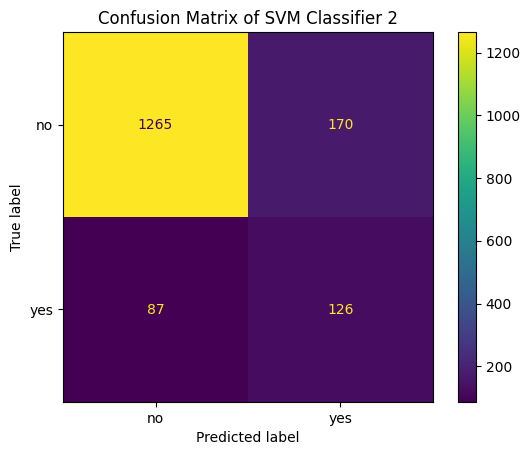

,Model Name,False Positives,False Negatives
0,Logistic Regression 1,229,62
1,Logistic Regression 2,229,62
2,Random Forest 1,56,125
3,Random Forest 2,54,130
4,SVM 1,244,50
5,SVM 2,170,87


In [257]:
cm_matrix = confusion_matrix(y_test, y_pred_svm2)

FP = cm_matrix[0, 1] 
FN = cm_matrix[1, 0] 

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_matrix, display_labels=['no', 'yes'])
cm_display.plot()
plt.title("Confusion Matrix of SVM Classifier 2")
plt.show()

cm_result = ['SVM 2', FP, FN]
cm_results.loc[len(cm_results)] = cm_result
cm_results

In [258]:
precision_yes = precision_score(y_test, y_pred_svm2, pos_label='yes')
recall_yes = recall_score(y_test, y_pred_svm2, pos_label='yes')
f1_yes = f1_score(y_test, y_pred_svm2, pos_label='yes')
precision_no = precision_score(y_test, y_pred_svm2, pos_label='no')
recall_no = recall_score(y_test, y_pred_svm2, pos_label='no')
f1_no = f1_score(y_test, y_pred_svm2, pos_label='no')

model_result = ['SVM 2', accuracy_score(y_test, y_pred_svm2), 
                precision_yes, precision_no, recall_yes, recall_no,
                f1_yes, f1_no]

results.loc[len(results)] = model_result
results

,Model Name,Accuracy,Precision yes,Precision no,Recall yes,Recall no,F1-Score yes,F1-Score no
0,Logistic Regression 1,0.823422,0.397368,0.951104,0.708920,0.840418,0.509275,0.892342
1,Logistic Regression 2,0.823422,0.397368,0.951104,0.708920,0.840418,0.509275,0.892342
2,Random Forest 1,0.890170,0.611111,0.916888,0.413146,0.960976,0.492997,0.938414
3,Random Forest 2,0.888350,0.605839,0.913964,0.389671,0.962369,0.474286,0.937542
4,SVM 1,0.821602,0.400491,0.959710,0.765258,0.829965,0.525806,0.890135
5,SVM 2,0.844053,0.425676,0.935651,0.591549,0.881533,0.495088,0.907786


### **4. Stacking using Random Forest and SVM**

In [265]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svc', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))
]

stacking_class = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_class.fit(x_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svc',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))]))],
                   final_estimator=LogisticRegression())

In [260]:
y_pred_stack = stacking_class.predict(x_test)

In [261]:
print('\nClassification Report MODEL 4 : Stacking\n')
print(classification_report(y_test, y_pred_stack, target_names=['no','yes']))


Classification Report MODEL 4 : Stacking

              precision    recall  f1-score   support

          no       0.91      0.98      0.95      1435
         yes       0.77      0.35      0.48       213

    accuracy                           0.90      1648
   macro avg       0.84      0.67      0.71      1648
weighted avg       0.89      0.90      0.89      1648



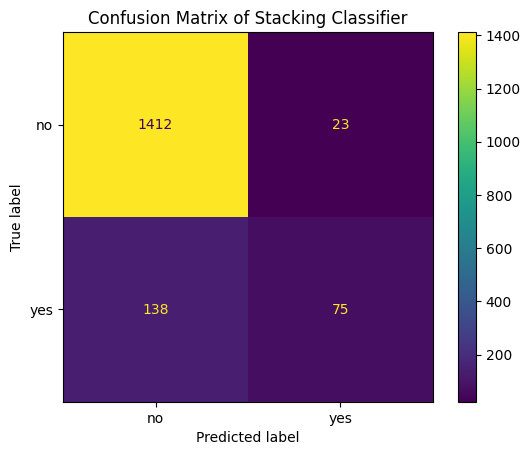

,Model Name,False Positives,False Negatives
0,Logistic Regression 1,229,62
1,Logistic Regression 2,229,62
2,Random Forest 1,56,125
3,Random Forest 2,54,130
4,SVM 1,244,50
5,SVM 2,170,87
6,Stacking,23,138


In [262]:
cm_matrix = confusion_matrix(y_test, y_pred_stack)

FP = cm_matrix[0, 1] 
FN = cm_matrix[1, 0] 

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_matrix, display_labels=['no', 'yes'])
cm_display.plot()
plt.title("Confusion Matrix of Stacking Classifier")
plt.show()

cm_result = ['Stacking', FP, FN]
cm_results.loc[len(cm_results)] = cm_result
cm_results

In [263]:
precision_yes = precision_score(y_test, y_pred_stack, pos_label='yes')
recall_yes = recall_score(y_test, y_pred_stack, pos_label='yes')
f1_yes = f1_score(y_test, y_pred_stack, pos_label='yes')
precision_no = precision_score(y_test, y_pred_stack, pos_label='no')
recall_no = recall_score(y_test, y_pred_stack, pos_label='no')
f1_no = f1_score(y_test, y_pred_stack, pos_label='no')

model_result = ['Stacking', accuracy_score(y_test, y_pred_stack), 
                precision_yes, precision_no, recall_yes, recall_no,
                f1_yes, f1_no]

results.loc[len(results)] = model_result
results

,Model Name,Accuracy,Precision yes,Precision no,Recall yes,Recall no,F1-Score yes,F1-Score no
0,Logistic Regression 1,0.823422,0.397368,0.951104,0.708920,0.840418,0.509275,0.892342
1,Logistic Regression 2,0.823422,0.397368,0.951104,0.708920,0.840418,0.509275,0.892342
2,Random Forest 1,0.890170,0.611111,0.916888,0.413146,0.960976,0.492997,0.938414
3,Random Forest 2,0.888350,0.605839,0.913964,0.389671,0.962369,0.474286,0.937542
4,SVM 1,0.821602,0.400491,0.959710,0.765258,0.829965,0.525806,0.890135
5,SVM 2,0.844053,0.425676,0.935651,0.591549,0.881533,0.495088,0.907786
6,Stacking,0.902306,0.765306,0.910968,0.352113,0.983972,0.482315,0.946064


Model **SVM 1** menunjukkan performa yang paling baik. Dapat dilihat dari hasil `False Positives` nya yang paling sedikit dan hasil `F1-Score` kelas `yes` yang paling tinggi.

Classification Report Model SVM 1: 
1. Precision : mengukur performa model menghindari **false positives**
- kelas yes memiliki precision 40% yang artinya sebanyak 40% kelas yes benar-benar terprediksi sebagai yes. 
- kelas no memiliki precision 95% yang artinya sebanyak 95% kelas no benar-benar terprediksi sebagai no.
Hasil precision di kelas no yang tinggi disebabkan karena adanya class imbalance dimana kelas no sebagai majority class. Jadi model akan menunjukkan performa yang lebih tinggi dalam memprediksi kelas no.

2. Recall : mengukur performa model menghindari **false negatives**
- kelas yes memiliki recall 76% yang artinya model berhasil memprediksi 76% yes di kelas yes.
- kelas no memiliki recall 82% yang artinya model berhasil memprediksi 82% yes di kelas no.
Hasil recall kelas yes jauh lebih tinggi dibandingkan precision kelas yes. Berarti model berhasil mengurangi false negative, yang memenuhi tujuan dari problem ini.


Problem ini bertujuan untuk mencari pelanggan yang akan melakukan deposito, sehingga kita membutuhkan false negative yang rendah. False negative yang rendah artinya pelanggan yang seharusnya melakukan deposito tidak boleh terprediksi sebagai pelanggan yang tidak melakukan deposito.

# **Pickle Best Model**

In [264]:
filename = 'SVM_model.pkl'
pkl.dump(svm, open(filename, 'wb'))